sentimental analysis in python

1. using VADER(Valence Aware Dictionary and sEntiment Reasoner)-bag of word approch


In [8]:
# step 0.Read in data and NLTK basics
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

import nltk

nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')
nltk.download('vader_lexicon')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\acer\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     C:\Users\acer\AppData\Roaming\nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\acer\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\acer\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [11]:
#read in data
data=pd.read_csv(r"C:\Users\acer\Downloads\Tweet.csv")
print(data)



                                                   text  label
0     I always wrote this series off as being a comp...      0
1     1st watched 12/7/2002 - 3 out of 10(Dir-Steve ...      0
2     This movie was so poorly written and directed ...      0
3     The most interesting thing about Miryang (Secr...      1
4     when i first read about "berlin am meer" i did...      0
...                                                 ...    ...
4995  This is the kind of picture John Lassiter woul...      1
4996  A MUST SEE! I saw WHIPPED at a press screening...      1
4997  NBC should be ashamed. I wouldn't allow my chi...      0
4998  This movie is a clumsy mishmash of various gho...      0
4999  Formula movie about the illegitimate son of a ...      0

[5000 rows x 2 columns]


In [10]:


print(data.shape)

(5000, 2)


In [31]:
data.head()


,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B000G6MBX2,A228P3VH7SFBHG,J,1,2,2,1219449600,Meh,I guess there's no telling what will tickle th...
1,2,B000G6MBX2,A1AQ2W2R4SOVGN,De Profundis,6,10,1,1195084800,"The ""Organic"" Label is Misleading","""Yeast Extract"" is listed as an ingredient. So..."
2,3,B000G6MBX2,A3NCTCNAUYCH6H,jesse girl,0,1,3,1278374400,Kind of Bland,These were not flavorful enough for my taste. ...
3,4,B000G6MBX2,ADD87VB66Y0DQ,"L. Pray ""bargainqueen""",0,1,5,1277337600,Delicious chips,Plocky's chips are made of several whole grain...
4,5,B000G6MBX2,A2GS0QUCV2KVMP,Stephanie J. Myers,0,1,4,1209686400,Broken chips but tasty,I love these chips and ordered them after I ha...


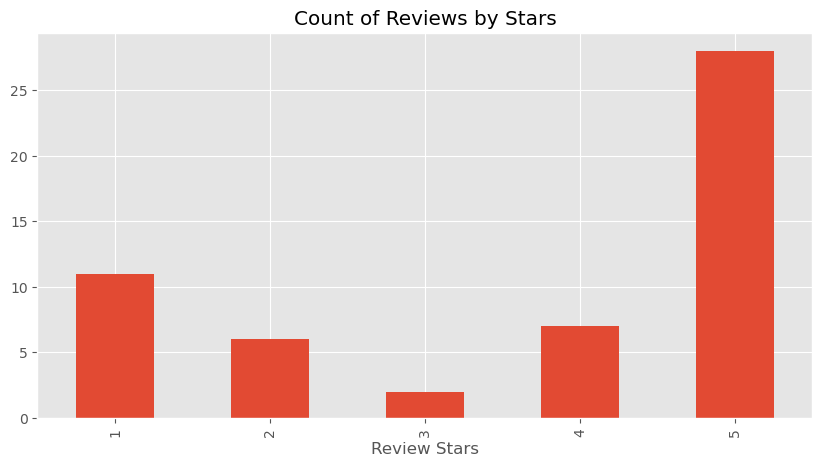

In [32]:
ax = data['Score'].value_counts().sort_index() \
    .plot(kind='bar',
          title='Count of Reviews by Stars',
          figsize=(10, 5))
ax.set_xlabel('Review Stars')
plt.show()

In [33]:
example = data['Text'][50]
print(example)

Twizzlers, Strawberry my childhood favorite candy, made in Lancaster Pennsylvania by Y & S Candies, Inc. one of the oldest confectionery Firms in the United States, now a Subsidiary of the Hershey Company, the Company was established in 1845 as Young and Smylie, they also make Apple Licorice Twists, Green Color and Blue Raspberry Licorice Twists, I like them all<br /><br />I keep it in a dry cool place because is not recommended it to put it in the fridge. According to the Guinness Book of Records, the longest Licorice Twist ever made measured 1.200 Feet (370 M) and weighted 100 Pounds (45 Kg) and was made by Y & S Candies, Inc. This Record-Breaking Twist became a Guinness World Record on July 19, 1998. This Product is Kosher! Thank You


In [14]:
tokens = nltk.word_tokenize(example)
tokens[:60]

['Twizzlers',
 ',',
 'Strawberry',
 'my',
 'childhood',
 'favorite',
 'candy',
 ',',
 'made',
 'in',
 'Lancaster',
 'Pennsylvania',
 'by',
 'Y',
 '&',
 'S',
 'Candies',
 ',',
 'Inc.',
 'one',
 'of',
 'the',
 'oldest',
 'confectionery',
 'Firms',
 'in',
 'the',
 'United',
 'States',
 ',',
 'now',
 'a',
 'Subsidiary',
 'of',
 'the',
 'Hershey',
 'Company',
 ',',
 'the',
 'Company',
 'was',
 'established',
 'in',
 '1845',
 'as',
 'Young',
 'and',
 'Smylie',
 ',',
 'they',
 'also',
 'make',
 'Apple',
 'Licorice',
 'Twists',
 ',',
 'Green',
 'Color',
 'and',
 'Blue']

In [34]:
tagged = nltk.pos_tag(tokens)
tagged[:60]

[('Twizzlers', 'NNS'),
 (',', ','),
 ('Strawberry', 'NNP'),
 ('my', 'PRP$'),
 ('childhood', 'NN'),
 ('favorite', 'JJ'),
 ('candy', 'NN'),
 (',', ','),
 ('made', 'VBN'),
 ('in', 'IN'),
 ('Lancaster', 'NNP'),
 ('Pennsylvania', 'NNP'),
 ('by', 'IN'),
 ('Y', 'NNP'),
 ('&', 'CC'),
 ('S', 'NNP'),
 ('Candies', 'NNP'),
 (',', ','),
 ('Inc.', 'NNP'),
 ('one', 'CD'),
 ('of', 'IN'),
 ('the', 'DT'),
 ('oldest', 'JJS'),
 ('confectionery', 'NN'),
 ('Firms', 'NNS'),
 ('in', 'IN'),
 ('the', 'DT'),
 ('United', 'NNP'),
 ('States', 'NNPS'),
 (',', ','),
 ('now', 'RB'),
 ('a', 'DT'),
 ('Subsidiary', 'NNP'),
 ('of', 'IN'),
 ('the', 'DT'),
 ('Hershey', 'NNP'),
 ('Company', 'NNP'),
 (',', ','),
 ('the', 'DT'),
 ('Company', 'NN'),
 ('was', 'VBD'),
 ('established', 'VBN'),
 ('in', 'IN'),
 ('1845', 'CD'),
 ('as', 'IN'),
 ('Young', 'NNP'),
 ('and', 'CC'),
 ('Smylie', 'NNP'),
 (',', ','),
 ('they', 'PRP'),
 ('also', 'RB'),
 ('make', 'VBP'),
 ('Apple', 'NNP'),
 ('Licorice', 'NNP'),
 ('Twists', 'NNP'),
 (',', ','),

In [35]:
entities = nltk.chunk.ne_chunk(tagged)
entities.pprint()

(S
  Twizzlers/NNS
  ,/,
  (PERSON Strawberry/NNP)
  my/PRP$
  childhood/NN
  favorite/JJ
  candy/NN
  ,/,
  made/VBN
  in/IN
  Lancaster/NNP
  Pennsylvania/NNP
  by/IN
  Y/NNP
  &/CC
  S/NNP
  Candies/NNP
  ,/,
  Inc./NNP
  one/CD
  of/IN
  the/DT
  oldest/JJS
  confectionery/NN
  Firms/NNS
  in/IN
  the/DT
  (GPE United/NNP States/NNPS)
  ,/,
  now/RB
  a/DT
  Subsidiary/NNP
  of/IN
  the/DT
  (ORGANIZATION Hershey/NNP Company/NNP)
  ,/,
  the/DT
  (ORGANIZATION Company/NN)
  was/VBD
  established/VBN
  in/IN
  1845/CD
  as/IN
  (PERSON Young/NNP)
  and/CC
  (GPE Smylie/NNP)
  ,/,
  they/PRP
  also/RB
  make/VBP
  (PERSON Apple/NNP Licorice/NNP Twists/NNP)
  ,/,
  (PERSON Green/NNP Color/NNP)
  and/CC
  (PERSON Blue/NNP Raspberry/NNP Licorice/NNP Twists/NNP)
  ,/,
  I/PRP
  like/VBP
  them/PRP
  all/DT
  </VBP
  br/JJ
  //NNP
  >/NNP
  </NNP
  br/NN
  //NNP
  >/NNP
  I/PRP
  keep/VBP
  it/PRP
  in/IN
  a/DT
  dry/JJ
  cool/NN
  place/NN
  because/IN
  is/VBZ
  not/RB
  recommended/VB

step1. VADER sentiment scoring
We will use NLTK's SentimentIntensityAnalyzer to get the neg/neu/pos scores of the text.

This uses a "bag of words" approach:
Stop words are removed
each word is scored and combined to a total score.

In [36]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

sia = SentimentIntensityAnalyzer()

In [37]:
sia.polarity_scores('I am so happy!')

{'neg': 0.0, 'neu': 0.318, 'pos': 0.682, 'compound': 0.6468}

In [38]:
sia.polarity_scores('This is the worst thing ever.')

{'neg': 0.451, 'neu': 0.549, 'pos': 0.0, 'compound': -0.6249}

In [39]:
sia.polarity_scores(example)

{'neg': 0.012, 'neu': 0.885, 'pos': 0.103, 'compound': 0.8957}

In [41]:
# Run the polarity score on the entire dataset
res = {}
for i, row in tqdm(data.iterrows(), total=len(data)):
    text = row['Text']
    myid = row['Id']
    res[myid] = sia.polarity_scores(text)

In [44]:
vaders = pd.DataFrame(res).T
vaders = vaders.reset_index().rename(columns={'index': 'Id'})
vaders = vaders.merge(data, how='left')

In [45]:
# Now we have sentiment score and metadata
vaders.head()

,Id,neg,neu,pos,compound,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,0.088,0.669,0.243,0.9403,B000G6MBX2,A228P3VH7SFBHG,J,1,2,2,1219449600,Meh,I guess there's no telling what will tickle th...
1,2,0.090,0.887,0.023,-0.6607,B000G6MBX2,A1AQ2W2R4SOVGN,De Profundis,6,10,1,1195084800,"The ""Organic"" Label is Misleading","""Yeast Extract"" is listed as an ingredient. So..."
2,3,0.075,0.858,0.066,-0.1045,B000G6MBX2,A3NCTCNAUYCH6H,jesse girl,0,1,3,1278374400,Kind of Bland,These were not flavorful enough for my taste. ...
3,4,0.087,0.774,0.139,0.6675,B000G6MBX2,ADD87VB66Y0DQ,"L. Pray ""bargainqueen""",0,1,5,1277337600,Delicious chips,Plocky's chips are made of several whole grain...
4,5,0.102,0.824,0.073,-0.2617,B000G6MBX2,A2GS0QUCV2KVMP,Stephanie J. Myers,0,1,4,1209686400,Broken chips but tasty,I love these chips and ordered them after I ha...


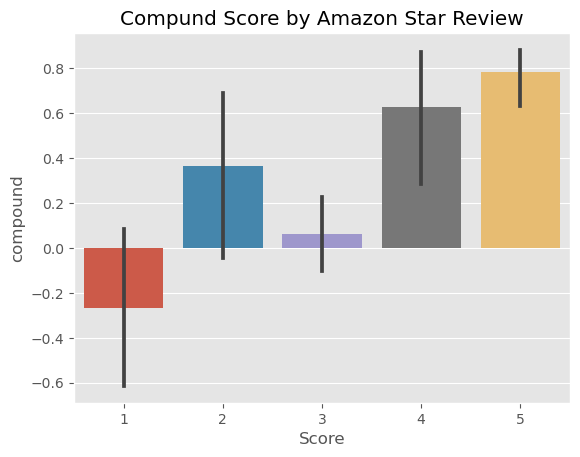

In [46]:
#Plot VADER results
ax = sns.barplot(data=vaders, x='Score', y='compound')
ax.set_title('Compund Score by Amazon Star Review')
plt.show()